In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BTC-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 97s 797ms/step - loss: 0.0058 - val_loss: 0.0096
Epoch 2/100
39/39 [==============================] - 16s 401ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 3/100
39/39 [==============================] - 16s 400ms/step - loss: 8.3163e-04 - val_loss: 0.0059
Epoch 4/100
39/39 [==============================] - 17s 448ms/step - loss: 7.3860e-04 - val_loss: 0.0023
Epoch 5/100
39/39 [==============================] - 16s 407ms/step - loss: 6.9023e-04 - val_loss: 0.0023
Epoch 6/100
39/39 [==============================] - 16s 418ms/step - loss: 6.5883e-04 - val_loss: 0.0019
Epoch 7/100
39/39 [==============================] - 17s 421ms/step - loss: 6.0945e-04 - val_loss: 0.0024
Epoch 8/100
39/39 [==============================] - 16s 411ms/step - loss: 5.8218e-04 - val_loss: 0.0017
Epoch 9/100
39/39 [==============================] - 16s 414ms/step - loss: 6.0406e-04 - val_loss: 0.0016
Epoch 10/100
39/39 [==============================] - 

39/39 [==============================] - 11s 278ms/step - loss: 1.1816e-04 - val_loss: 3.9713e-04
Epoch 77/100
39/39 [==============================] - 10s 256ms/step - loss: 1.2000e-04 - val_loss: 4.5485e-04
Epoch 78/100
39/39 [==============================] - 12s 311ms/step - loss: 1.4468e-04 - val_loss: 6.0339e-04
Epoch 79/100
39/39 [==============================] - 12s 311ms/step - loss: 1.4229e-04 - val_loss: 4.6710e-04
Epoch 80/100
39/39 [==============================] - 14s 359ms/step - loss: 1.4741e-04 - val_loss: 4.1923e-04
Epoch 81/100
39/39 [==============================] - 13s 330ms/step - loss: 1.4554e-04 - val_loss: 6.6294e-04
Epoch 82/100
39/39 [==============================] - 15s 376ms/step - loss: 1.4925e-04 - val_loss: 6.8821e-04
Epoch 83/100
39/39 [==============================] - 16s 404ms/step - loss: 1.2905e-04 - val_loss: 3.9989e-04
Epoch 84/100
39/39 [==============================] - 17s 436ms/step - loss: 1.3287e-04 - val_loss: 3.9902e-04
Epoch 85/100
3

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

7/7 [==============================] - 1s 119ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.027
RMSE on validation set: 0.019
MAPE on test set: 0.045
MAPE on validation set: 0.050
The explained variance score (EVS) on test set: 0.978
The explained variance score (EVS) on validate set: 0.976


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.32708241 0.3196377  0.29952961 0.2969212  0.30352714 0.32625408
 0.35643099 0.36457095 0.35907873 0.36912237 0.40430839 0.39751124
 0.41343077 0.40940281 0.41546584 0.40257973 0.41781277 0.40533757
 0.40535867 0.41277272 0.40009342 0.40199644 0.41802747 0.4133549
 0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913

7 day output [[0.5050518]]
8 day input [0.35907873 0.36912237 0.40430839 0.39751124 0.41343077 0.40940281
 0.41546584 0.40257973 0.41781277 0.40533757 0.40535867 0.41277272
 0.40009342 0.40199644 0.41802747 0.4133549  0.41995722 0.41895632
 0.41581445 0.40974388 0.41535119 0.41549801 0.41351187 0.41175666
 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885 0.44845727
 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348  0.42506483
 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324 0.41742138
 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503 0.41421566
 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081 0.41960841
 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377 0.39481345
 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768 0.39638717
 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676 0.39024487
 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994 0.40127714
 0.3953461  0.40172131 0.39913243 0.39978444 0.37961832 0.40156095
 0.38831266 0.39071987 

15 day output [[0.6820947]]
16 day input [0.41781277 0.40533757 0.40535867 0.41277272 0.40009342 0.40199644
 0.41802747 0.4133549  0.41995722 0.41895632 0.41581445 0.40974388
 0.41535119 0.41549801 0.41351187 0.41175666 0.41208217 0.41779909
 0.43738589 0.44602351 0.44459885 0.44845727 0.44974283 0.44726166
 0.44721506 0.43430028 0.4484348  0.42506483 0.41650714 0.40212672
 0.41014869 0.4067933  0.40581324 0.41742138 0.41912943 0.43472679
 0.43274537 0.43138352 0.43168503 0.41421566 0.42295553 0.42778975
 0.42543627 0.43562601 0.42628081 0.41960841 0.40832009 0.40779333
 0.40724398 0.39802928 0.39512377 0.39481345 0.3969883  0.40087701
 0.39856144 0.40393552 0.39552768 0.39638717 0.39994054 0.39436453
 0.39581064 0.40136719 0.38814676 0.39024487 0.39385206 0.39606404
 0.41412779 0.40908597 0.40843994 0.40127714 0.3953461  0.40172131
 0.39913243 0.39978444 0.37961832 0.40156095 0.38831266 0.39071987
 0.39030672 0.38097081 0.38229043 0.38173147 0.38197229 0.37018912
 0.39183789 0.4025937

23 day output [[0.77295434]]
24 day input [0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913243 0.39978444
 0.37961832 0.40156095 0.38831266 0.39071987 0.39030672 0.38097081
 0.38229043 0.38173147 0.38197229 0.37018912 0.39183789 0.40259373
 0.41709626 0.43292129 0.44970167 0.46730655 0.48573297 0.50505179
 0.52534026 0.5466203

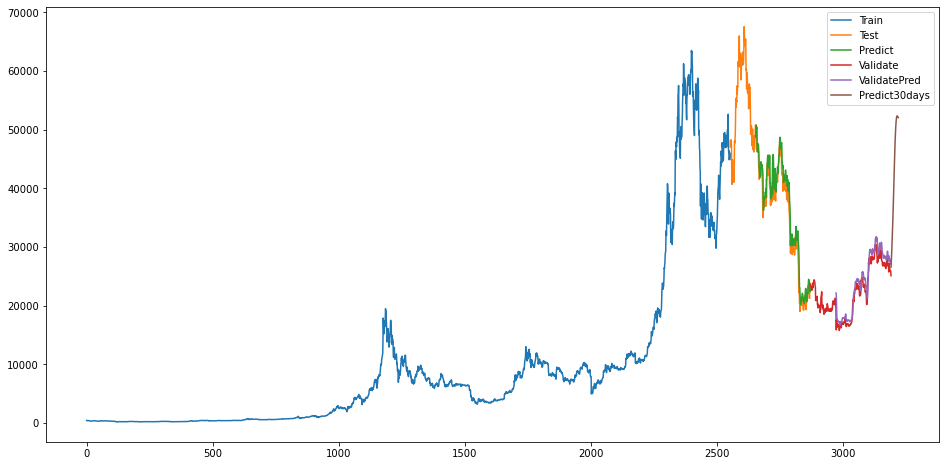

In [14]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()